# Exploring the ab_testing case study

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df_exp = pd.read_csv('df_final_experiment_clients.txt')
df_wd_1 = pd.read_csv('df_final_web_data_pt_1.txt')
df_wd_2 = pd.read_csv('df_final_web_data_pt_2.txt')

In [123]:
df_exp.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [124]:
df_wd_1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


### show the comparative number of clients involved in the Variation Test / Control group 

In [125]:
df_exp.groupby('Variation').count().rename(columns={'client_id':'count_client_id'})

,count_client_id
Variation,
Control,23532
Test,26968


### comparing the the test and control graphically

In [126]:
# combining both web data tables
df_web = pd.concat([df_wd_1, df_wd_2])

In [127]:
df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [128]:
# adding test or control group information

df = pd.merge(df_exp, df_web, how='inner', on='client_id')

In [129]:
df.groupby('Variation').count()

,client_id,visitor_id,visit_id,process_step,date_time
Variation,,,,,
Control,143462,143462,143462,143462,143462
Test,177847,177847,177847,177847,177847


In [130]:
df.groupby('Variation').nunique()

,client_id,visitor_id,visit_id,process_step,date_time
Variation,,,,,
Control,23532,26277,32189,5,132754
Test,26968,29919,37136,5,164138


In [131]:
df_test = df[df['Variation'] == 'Test']
df_control = df[df['Variation'] == 'Control']

In [132]:
# creating table to show how many total clients made it to each step

pr_test = df_test.groupby('process_step').count().reset_index().reindex([1, 2, 3, 4, 0])[['process_step', 'client_id']]

In [133]:
pr_test

,process_step,client_id
1,start,56474
2,step_1,38768
3,step_2,30989
4,step_3,25894
0,confirm,25722


In [134]:
# changing table to show percentage

pr_test['client_id'] = pr_test['client_id'].apply(lambda x:round((x/pr_test['client_id'][1])*100, 1))

In [135]:
# creating table to show how many total clients made it to each step

pr_control = df_control.groupby('process_step').count().reset_index().reindex([1, 2, 3, 4, 0])[['process_step', 'client_id']]

In [136]:
pr_control

,process_step,client_id
1,start,47608
2,step_1,29668
3,step_2,25886
4,step_3,22795
0,confirm,17505


In [137]:
# changing table to show percentage
pr_control['client_id'] = pr_control['client_id'].apply(lambda x:round((x/pr_control['client_id'][1])*100, 1))

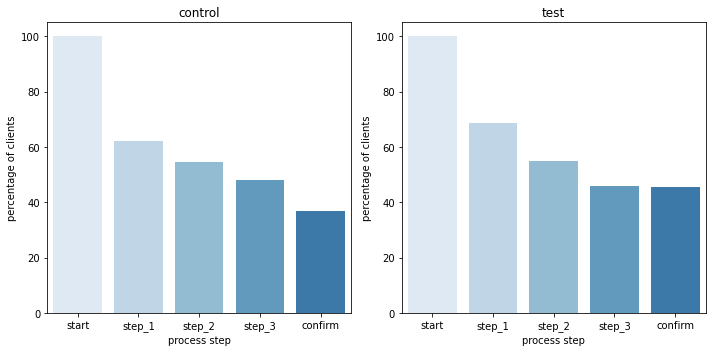

In [138]:
sns.set_palette('Blues')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.barplot(x = pr_test['process_step'], y=pr_test['client_id'], ax = axes[1])
sns.barplot(x = pr_control['process_step'], y=pr_control['client_id'], ax = axes[0])

axes[0].title.set_text('control')
axes[0].set_ylabel('percentage of clients')
axes[0].set_xlabel('process step')
axes[1].title.set_text('test')
axes[1].set_ylabel('percentage of clients')
axes[1].set_xlabel('process step')

plt.tight_layout()

In [139]:
pr_control

,process_step,client_id
1,start,100.0
2,step_1,62.3
3,step_2,54.4
4,step_3,47.9
0,confirm,36.8


In [140]:
pr_test

,process_step,client_id
1,start,100.0
2,step_1,68.6
3,step_2,54.9
4,step_3,45.9
0,confirm,45.5


### repeating the test for unique visitors

In [141]:
pr_test_unique = df_test.groupby('process_step').nunique().reset_index().reindex([1, 2, 3, 4, 0])[['process_step', 'client_id']]
pr_test_unique['client_id'] = pr_test['client_id'].apply(lambda x:round((x/pr_test['client_id'][1])*100, 1))

pr_control_unique = df_control.groupby('process_step').nunique().reset_index().reindex([1, 2, 3, 4, 0])[['process_step', 'client_id']]
pr_control_unique['client_id'] = pr_control['client_id'].apply(lambda x:round((x/pr_control['client_id'][1])*100, 1))

Text(0.5, 0, 'process step')

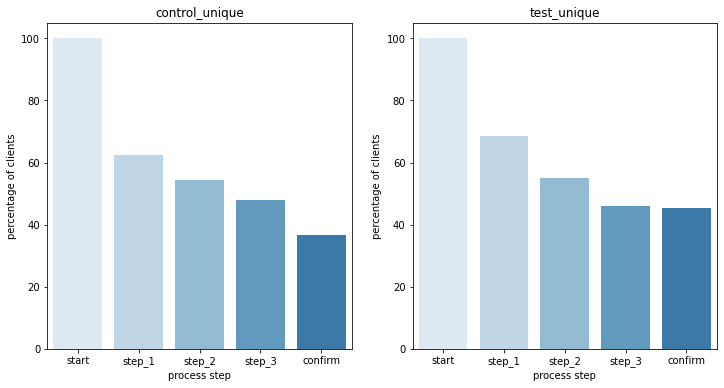

In [142]:
sns.set_palette('Blues')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.barplot(x = pr_test_unique['process_step'], y=pr_test_unique['client_id'], ax = axes[1])
sns.barplot(x = pr_control_unique['process_step'], y=pr_control_unique['client_id'], ax = axes[0])

axes[0].title.set_text('control_unique')
axes[0].set_ylabel('percentage of clients')
axes[0].set_xlabel('process step')
axes[1].title.set_text('test_unique')
axes[1].set_ylabel('percentage of clients')
axes[1].set_xlabel('process step')

### significance

In [143]:
import statsmodels.api as sm

In [144]:
df

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
449826,9895983,NaN,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09
449827,9895983,NaN,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37
449828,9895983,NaN,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05
449829,9895983,NaN,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00


In [182]:
df['process_step'].value_counts()

start      145588
step_1      95896
step_2      79571
step_3      68217
confirm     60559
Name: process_step, dtype: int64

In [188]:
df_hypo = df.copy()

In [189]:
df_hypo.dropna(inplace=True)

In [190]:
df_hypo = df_hypo[df_hypo['process_step'].isin(['start', 'confirm'])]

In [191]:
df_hypo

,client_id,Variation,visitor_id,visit_id,process_step,date_time
7,9988021,Test,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,9988021,Test,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:54:43
9,9988021,Test,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:38:42
10,9988021,Test,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:22:40
11,9988021,Test,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:06:39
...,...,...,...,...,...,...
321294,7230446,Test,301456995_82370441715,999642113_50361812747_686928,start,2017-03-16 13:53:01
321295,5230357,Test,832474317_11880812098,28245330_61880751416_631586,confirm,2017-04-19 11:24:46
321299,5230357,Test,832474317_11880812098,97970868_52428347383_438804,start,2017-04-19 11:23:05
321300,6334360,Test,629124187_65258232847,586047816_14599436811_389185,confirm,2017-04-11 08:47:23


In [192]:
df_hypo['process_step'] = df_hypo['process_step'].replace({'start':0, 'confirm':1})

In [195]:
df_hypo[['process_step', 'Variation']].value_counts()

process_step  Variation
0             Test         56474
              Control      47608
1             Test         25722
              Control      17505
dtype: int64

In [194]:
sm.stats.ttest_ind(df_hypo[df_hypo['Variation'] == 'Test']['process_step'], df_hypo[df_hypo['Variation'] == 'Control']['process_step'])

(18.47965573047393, 3.673085584937987e-76, 147307.0)